# Predictive Analysis for Ratings

<div class="span5 alert alert-info">
<b>
Create training and test sets
</b>
</div>  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfm = pd.read_csv("../DataFiles/zomato_clean_data_csv/zomato_reduced_data.csv")
dfm.columns


Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews', 'reviews_new', 'restaurant_category_enc', 'locality_enc',
       'featured_in_count', 'Chinese', 'North Indian', 'South Indian',
       'Fast Food', 'Cocktails', 'Mocktails', 'Pizza', 'Pasta',
       'Friendly Staff', 'Courteous Staff', 'Decor'],
      dtype='object')

In [3]:
dfm['featured_in_count'] = dfm['featured_in_count'].fillna(0)

In [4]:
dfm = dfm[dfm['rating'].notnull()]
dfm = dfm[dfm['votes'].notnull()]

In [5]:
#defining independent variables

X = dfm[['locality_enc','restaurant_category_enc','photos_taken','votes','approx_cost_for_2',
         'featured_in_count','zomato_gold','discounts',
         'known_for',
         'more_info',
         #'opening_timings',#
         'Cocktails','Mocktails','Pizza','Pasta',
        'Friendly Staff', 'Courteous Staff','Decor','rating']] #independent columns

y = dfm['rating'] #target column


** **

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [7]:
#Target encoding for restaurant categories

col = 'restaurant_category_enc'

means = X_train.groupby('restaurant_category_enc')['rating'].mean()

X_train[col+'_mean_target'] = X_train[col].map(means)
X_train[col+ '_mean_target'].fillna(means.mean(), inplace = True)

X_test[col+'_mean_target'] = X_test[col].map(means)
X_test[col+ '_mean_target'].fillna(means.mean(), inplace = True)


/Users/Anand/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/Anand/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/Anand/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [8]:
X_test = X_test[['restaurant_category_enc_mean_target','photos_taken','votes','approx_cost_for_2',
                 'featured_in_count','zomato_gold','discounts',
                 'known_for',
                 'more_info',
                 'Cocktails','Mocktails','Pizza','Pasta',
                 'Friendly Staff', 'Courteous Staff','Decor']]

X_train = X_train[['restaurant_category_enc_mean_target','photos_taken','votes','approx_cost_for_2',
                   'featured_in_count','zomato_gold','discounts',
                   'known_for',
                   'more_info',
                   'Cocktails','Mocktails','Pizza','Pasta',
                   'Friendly Staff', 'Courteous Staff','Decor']]


<div class="span5 alert alert-info">
<i>
<b>    
Linear Regression
</b>    
</i>
</div>

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the regressor: reg_all
reg_all = LinearRegression()

# # Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# # Predict on the test data: y_pred
y_pred_test = reg_all.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = reg_all.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))


Test accuracy 0.5650701106273819
Train accuracy 0.5168134628097882


Text(0, 0.5, 'y_pred_train')

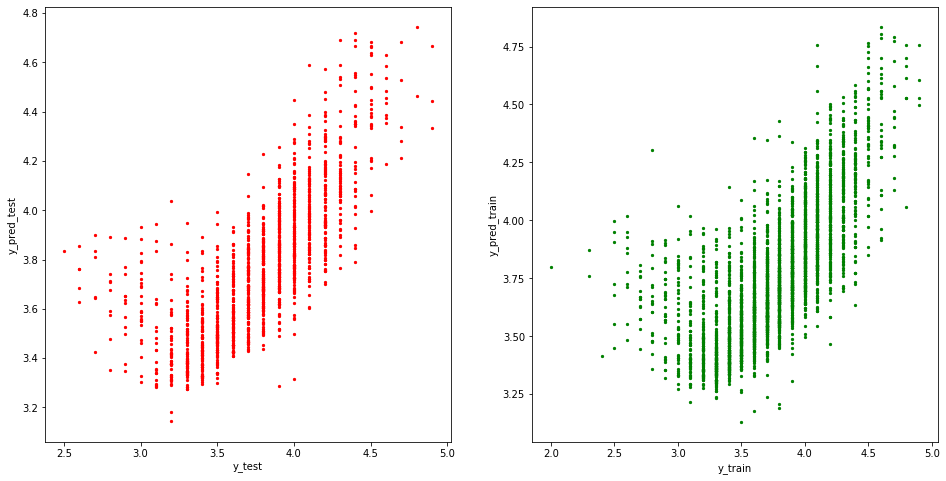

In [10]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, color = 'red',s=5)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_train, color = 'green',s=5)
plt.xlabel('y_train')
plt.ylabel('y_pred_train')


** **

<div class="span5 alert alert-info">
<i>
<b>
RandomForestRegressor
</b>
</i>    
</div>

In [11]:
from sklearn.ensemble import RandomForestRegressor

RForest = RandomForestRegressor(n_estimators=100,random_state=329,min_samples_leaf=.0001)

RForest.fit(X_train,y_train)

y_pred_test = RForest.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = RForest.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))

Test accuracy 0.5476368081176365
Train accuracy 0.9319015725052022


Text(0, 0.5, 'y_pred_train')

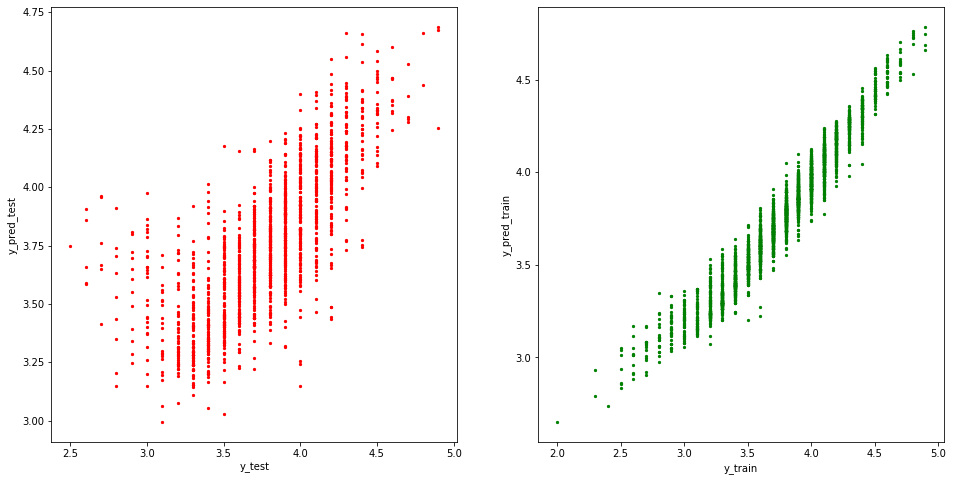

In [12]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, color = 'red',s=5)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')


plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_train, color = 'green',s=5)
plt.xlabel('y_train')
plt.ylabel('y_pred_train')


<div class="span5 alert alert-info">
<b>
Hyper parameter tuning
</b>
</div>

<div class="span5 alert alert-info">
<b>
RandomSearchCV
</b>
</div>

In [13]:
print(RForest.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.0001, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 329, 'verbose': 0, 'warm_start': False}


In [14]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.7s
/Users/Anand/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [16]:
print(rf_random.best_params_)

{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [17]:
best_random = rf_random.best_estimator_

In [18]:
best_random.fit(X_train,y_train)

y_pred_test = best_random.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = best_random.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))

Test accuracy 0.6023152073595284
Train accuracy 0.6858187175578061


Text(0, 0.5, 'y_pred_train')

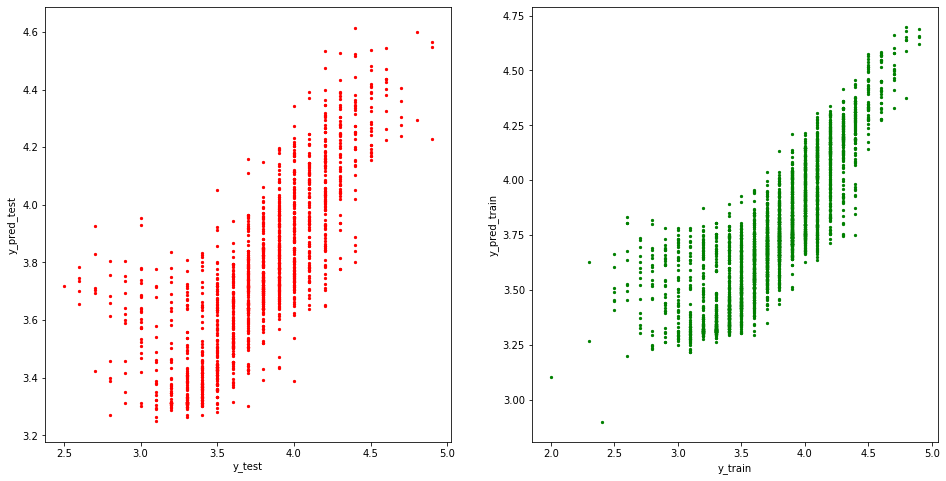

In [19]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, color = 'red',s=5)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')


plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_train, color = 'green',s=5)
plt.xlabel('y_train')
plt.ylabel('y_pred_train')

<div class="span5 alert alert-info">
<b>
GridSearchCV
    
Narrowing the parameters range obtained from random search
</b>
</div>

In [20]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [21]:
from sklearn.model_selection import GridSearchCV

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [22]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.8min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [23]:
best_grid = grid_search.best_estimator_

In [24]:
best_grid.fit(X_train,y_train)

y_pred_test = best_grid.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = best_random.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))

Test accuracy 0.5956566938829724
Train accuracy 0.6858187175578061


** **

<div class="span5 alert alert-info">
<b>
<i>    
XG Boost
</i>    
</b>
</div>

In [25]:
import xgboost

xgb = xgboost.XGBRegressor()

xgb.fit(X_train,y_train)

y_pred_test = xgb.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = xgb.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))

/Users/Anand/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:21:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test accuracy 0.6013679785025707
Train accuracy 0.6214343741282311


Text(0, 0.5, 'y_pred_train')

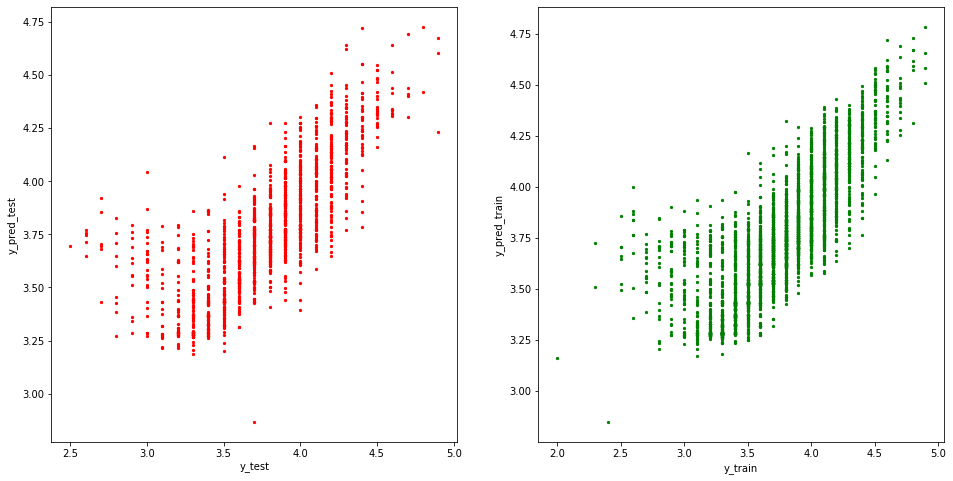

In [26]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, color = 'red',s=5)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_train, color = 'green',s=5)
plt.xlabel('y_train')
plt.ylabel('y_pred_train')


<div class="span5 alert alert-info">
<b>
Hyper parameter tuning
</b>
</div>

<div class="span5 alert alert-info">
<b>
RandomSearchCV
</b>
</div>

In [28]:
print(xgb.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [29]:
param_xg = {   'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
                'max_depth':[3,4,5,6,8,10,12,15],
                'min_child_weight':[1,3,5,7],
                'reg_lambda':[0,0.1,0.2,0.3,0.4]
           }

In [30]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

xg_random = RandomizedSearchCV(estimator = xgb, param_distributions = param_xg, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

xg_random.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished
/Users/Anand/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:23:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [31]:
xg_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [32]:
xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=0.4, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [33]:
xgb.fit(X_train,y_train)

y_pred_test = xgb.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = xgb.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))

[12:24:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test accuracy 0.6024138407402954
Train accuracy 0.6184483009683994


<div class="span5 alert alert-info">
<b>
Plotting Feature importance
</b>
</div>

In [47]:
xgb.feature_importances_

array([0.02962964, 0.5313309 , 0.1476723 , 0.04040176, 0.11814345,
       0.00669769, 0.00831953, 0.03495465, 0.01436714, 0.        ,
       0.01008315, 0.0054883 , 0.01200172, 0.02461362, 0.01450068,
       0.00179543], dtype=float32)

In [48]:
f_imp_series = pd.Series(xgb.feature_importances_, index=X_train.columns)

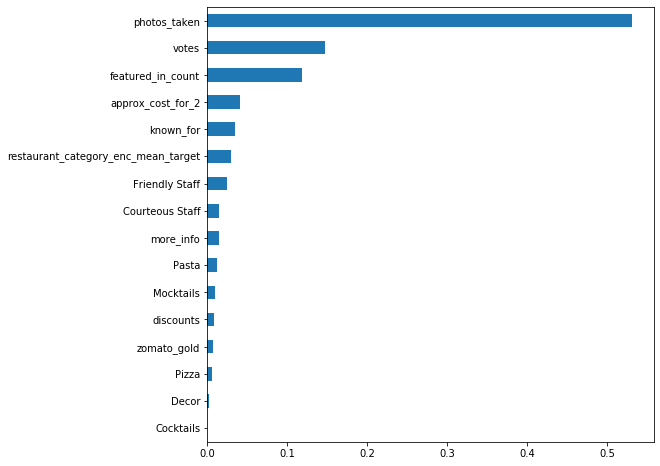

In [55]:
plt.figure(figsize=(8,8))
f_imp_series.sort_values().plot(kind='barh')

** **

<div class="span5 alert alert-info">
<b>
Consolidating the Results:
</b>
</div>

**1. Analysing different models, we find that RandomForestRegressor and XGBoost model have almost close test accuracy of 0.6**


**2. From the feature importance plot above we see that features like photo_taken, votes, featured_in_count, approx_cost_2 are the most significant factors affecting the 'Rating' of a restaurant.** 

** **